In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r'Data sets\bom.movie_gross.csv')
data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
data.shape

(3387, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
data["foreign_gross"]=data["foreign_gross"].fillna(0)
data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [9]:
# Remove $ and commas from 'domestic_gross' and 'foreign_gross', then convert to numeric
data['foreign_gross'] = (
    data['foreign_gross']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [11]:
# Create total gross column
data['total_gross'] = data['domestic_gross'] + data['foreign_gross']

In [17]:
#Group by studio and sum total_gross
studio_revenue = (
    data.groupby('studio')['total_gross']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
#studio_revenue['total_gross'] = studio_revenue['total_gross'].apply(lambda x: f"{int(x):,}")
studio_revenue

,studio,total_gross
0,BV,4.421288e+10
1,Fox,3.100537e+10
2,WB,3.083595e+10
3,Uni.,2.975716e+10
4,Sony,2.240492e+10
5,Par.,1.954926e+10
6,WB (NL),1.033470e+10
7,LGF,8.594583e+09
8,LG/S,5.431924e+09
9,P/DW,5.076500e+09


C:\Users\HomePC\AppData\Local\Temp\ipykernel_27184\152590726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=studio_revenue, x='studio', y='total_gross', palette='rocket')


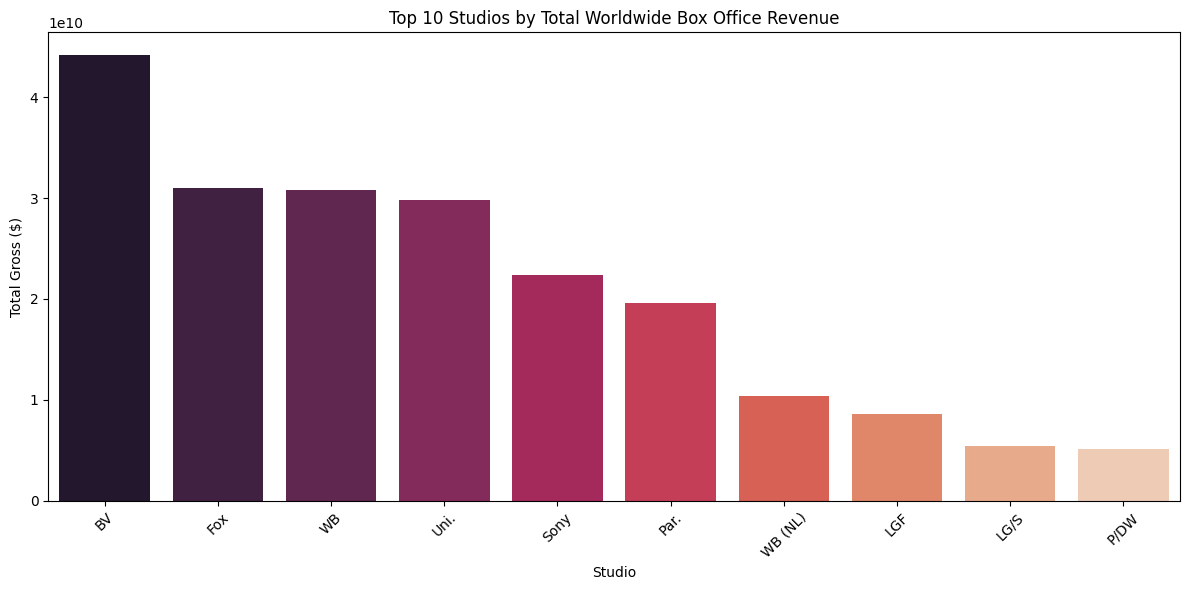

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=studio_revenue, x='studio', y='total_gross', palette='rocket')
plt.title('Top 10 Studios by Total Worldwide Box Office Revenue')
plt.ylabel('Total Gross ($)')
plt.xlabel('Studio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
data["year"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [29]:
gross_by_year = data.groupby('year')['total_gross'].sum().reset_index()
gross_by_year

,year,total_gross
0,2010,2.452960e+10
1,2011,2.573033e+10
2,2012,2.787959e+10
3,2013,2.737257e+10
4,2014,2.729441e+10
5,2015,2.620576e+10
6,2016,3.023504e+10
7,2017,3.086220e+10
8,2018,2.856570e+10


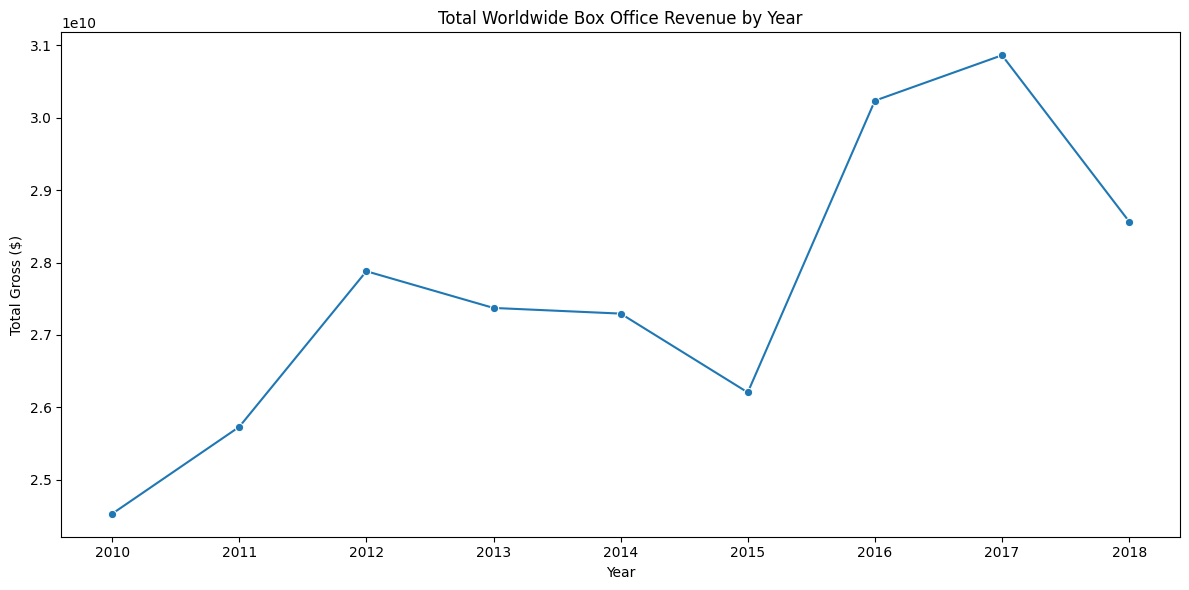

In [ ]:


plt.figure(figsize=(12, 6))
sns.lineplot(data=gross_by_year, x='year', y='total_gross', marker='o')
plt.title("Total Worldwide Box Office Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Gross ($)")
plt.tight_layout()
plt.show()

## Movie Info

In [32]:
dt = pd.read_csv(r'Data sets\rt.movie_info.tsv.gz', sep='\t', compression='gzip')
dt.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [22]:
dt.shape

(1560, 12)

In [21]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [33]:
# Clean box_office column
dt['box_office'] = pd.to_numeric(dt['box_office'].str.replace('[\$,]', '', regex=True), errors='coerce')

# Convert runtime to integer minutes (assuming format like '120 min')
dt['runtime'] = dt['runtime'].str.extract('(\d+)').astype(float)

# Convert theater_date to datetime and extract year from date
dt['theater_date'] = pd.to_datetime(dt['theater_date'], errors='coerce')
dt['year'] = dt['theater_date'].dt.year


In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   object        
 8   currency      340 non-null    object        
 9   box_office    340 non-null    float64       
 10  runtime       1530 non-null   float64       
 11  studio        494 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 146.4+ KB


In [ ]:
#counting the values of genre
genre_counts = dt['genre'].value_counts().head(10)
genre_counts 

genre
Drama                                              151
Comedy                                             110
Comedy|Drama                                        80
Drama|Mystery and Suspense                          67
Art House and International|Drama                   62
Action and Adventure|Drama                          42
Action and Adventure|Drama|Mystery and Suspense     40
Drama|Romance                                       35
Comedy|Romance                                      32
Art House and International|Comedy|Drama            31
Name: count, dtype: int64

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27184\222668578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


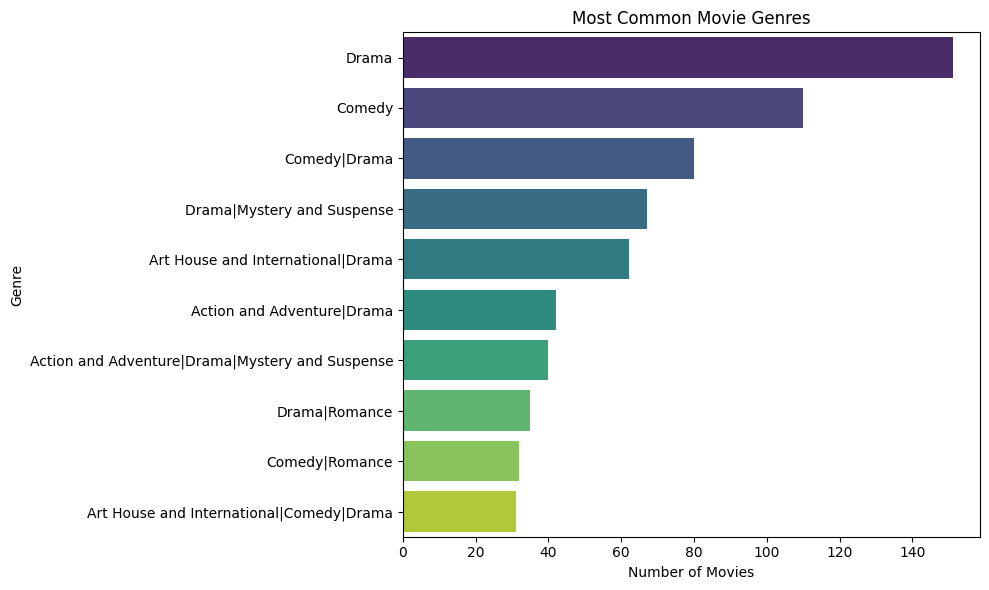

In [ ]:
#plotting the genre and counts
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Most Common Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [ ]:
#counting the ratings
rating_counts = dt['rating'].value_counts()
rating_counts

rating
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: count, dtype: int64

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27184\716250213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')


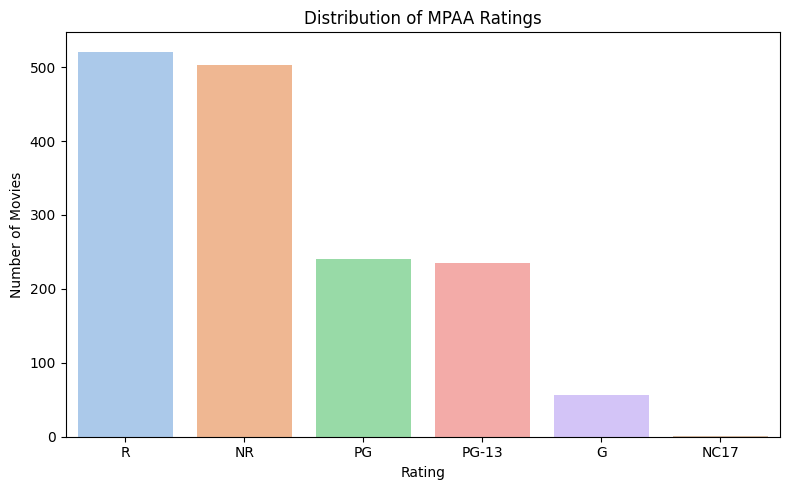

In [ ]:
#Plotting the ratings with counts
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

In [57]:
# #Plotting runtime by rating
# plt.figure(figsize=(10,6))
# sns.boxplot(data=dt, x='rating', y='runtime', palette='Set2')
# plt.title('Movie Runtime by MPAA Rating')
# plt.xlabel('Rating')
# plt.ylabel('Runtime (minutes)')
# plt.tight_layout()
# plt.show()

In [ ]:
# Summary Runtime Stats by Rating
rating_runtime_stats = dt.groupby('rating')['runtime'].agg(['count', 'mean', 'median', 'std']).sort_values(by='mean', ascending=False)
rating_runtime_stats

,count,mean,median,std
rating,,,,
PG-13,232,107.375000,106.0,18.466581
R,519,106.568401,103.0,20.984151
PG,239,104.748954,100.0,18.297832
NR,482,99.887967,95.0,31.856942
G,57,97.912281,95.0,25.736495
NC17,1,89.000000,89.0,NaN


In [52]:
#Compute Mean Runtime per Rating
mean_runtimes = (
    dt.groupby('rating')['runtime']
    .mean()
    .dropna()
    .sort_values(ascending=False)
    .reset_index()
)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27184\4188268281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_runtimes, x='rating', y='runtime', palette='coolwarm')


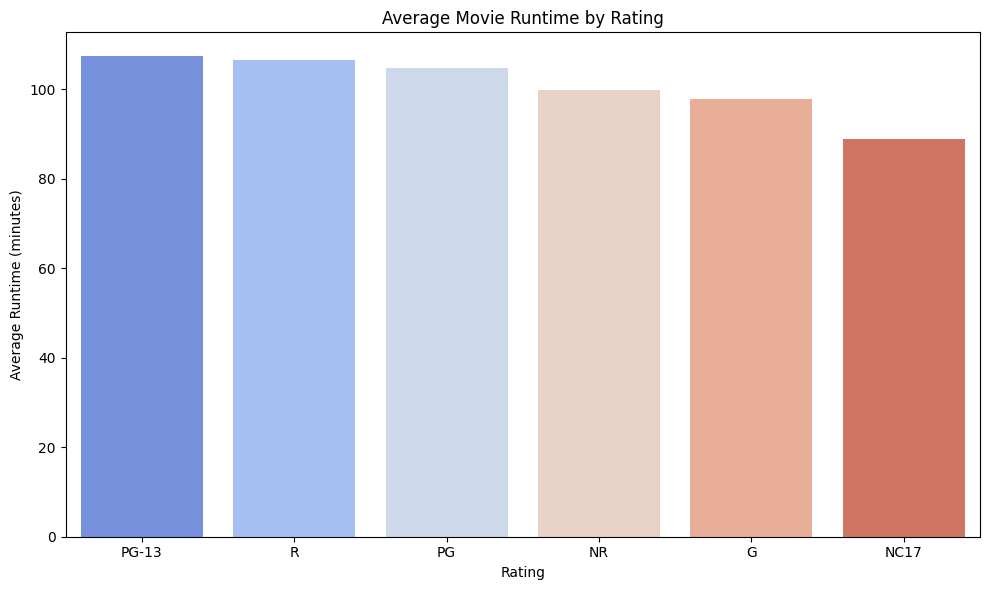

In [55]:
#Plotting Bar Chart of the ratings and mean runtime
plt.figure(figsize=(10,6))
sns.barplot(data=mean_runtimes, x='rating', y='runtime', palette='coolwarm')
plt.title('Average Movie Runtime by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Runtime (minutes)')
plt.tight_layout()
plt.show()

In [ ]:
# Drop missing directors and do counts
top_directors = (
    dt['director']
    .dropna()
    .value_counts()
    .head(10)
    .reset_index()
)
# Rename columns for clarity
top_directors.columns = ['director', 'movie_count']
top_directors

,director,movie_count
0,Steven Spielberg,10
1,Clint Eastwood,8
2,Yimou Zhang,4
3,William Beaudine,4
4,Bruce Beresford,4
5,Curtis Hanson,4
6,Alfred Hitchcock,4
7,Woody Allen,4
8,Ridley Scott,4
9,William Friedkin,4


C:\Users\HomePC\AppData\Local\Temp\ipykernel_27184\201409334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='movie_count', y='director', palette='mako')


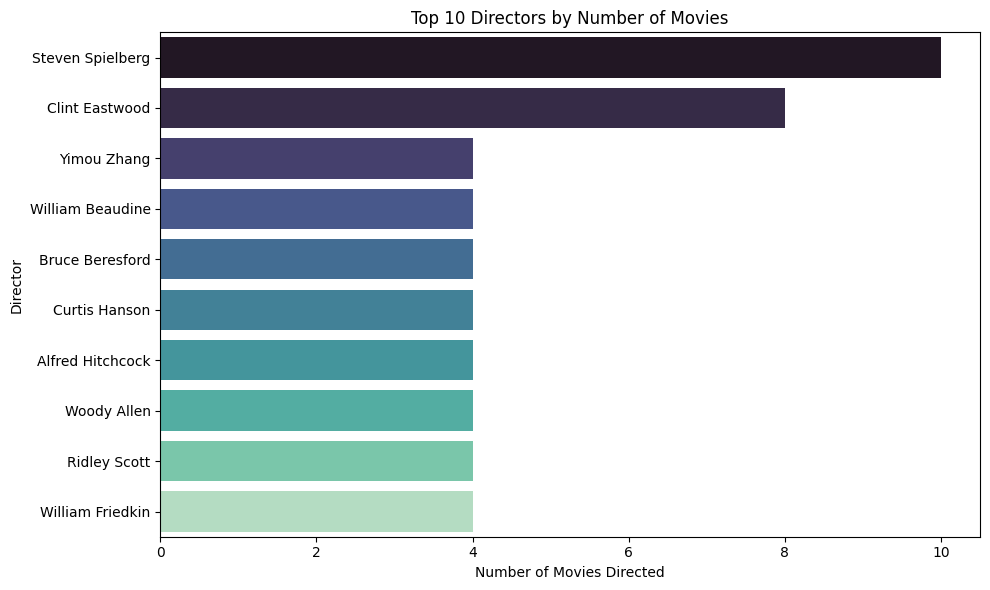

In [ ]:
#plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_directors, x='movie_count', y='director', palette='mako')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

In [47]:
# Drop missing writers and count occurrences
top_writers = (
    dt['writer']
    .dropna()
    .value_counts()
    .head(10)
    .reset_index()
)

# Rename columns for clarity
top_writers.columns = ['writer', 'movie_count']
top_writers

,writer,movie_count
0,Woody Allen,4
1,John Hughes,3
2,Hong Sang-soo,3
3,Sylvester Stallone,3
4,Jim Jarmusch,3
5,Steven Zaillian,2
6,Daniel Taplitz,2
7,Seth MacFarlane|Alec Sulkin|Wellesley Wild,2
8,Mike White,2
9,David Mamet,2


C:\Users\HomePC\AppData\Local\Temp\ipykernel_27184\4187828141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_writers, x='movie_count', y='writer', palette='crest')


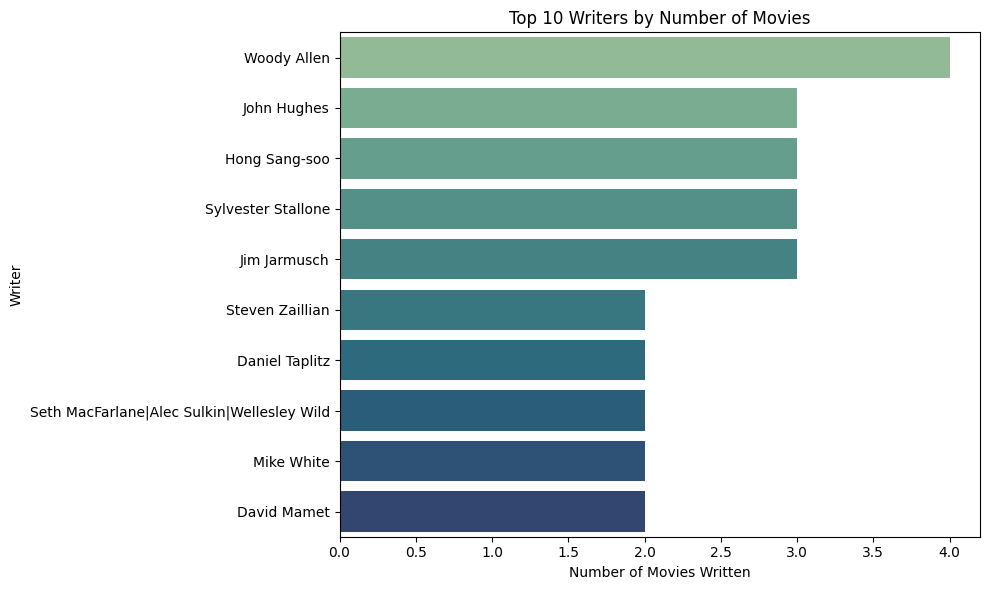

In [49]:
#Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_writers, x='movie_count', y='writer', palette='crest')
plt.title('Top 10 Writers by Number of Movies')
plt.xlabel('Number of Movies Written')
plt.ylabel('Writer')
plt.tight_layout()
plt.show()